### Solution to the Exercise Sheet 4 
#### by Junya Inoue and Loreen Ruhm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
%matplotlib inline

## Exercise 1

### 1a

In [2]:
mu = 0
def Kernel1(x1, x2):
    return x1 * x2

def Kernel2(x1, x2):
    beta = 0.25
    return np.exp(-beta / 2 * (x1 - x2)**2)


In [3]:
nSample = 8

x = np.linspace(-6,6)
N = len(x)
m = np.ones(N) * mu # zero

# covariance matrix
C1 = np.zeros((N, N))
C2 = np.zeros((N, N))

for i in range(N):
    C1[i, :] = Kernel1(x, x[i])
    C2[i, :] = Kernel2(x, x[i])

# y    
y1 = np.zeros((nSample, N))    
y2 = np.zeros((nSample, N))    

for i in range(nSample):
    y1[i, :] = np.random.multivariate_normal(m, C1)
    y2[i, :] = np.random.multivariate_normal(m, C2)
    


/home/andrii/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: covariance is not positive-semidefinite.
/home/andrii/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: covariance is not positive-semidefinite.


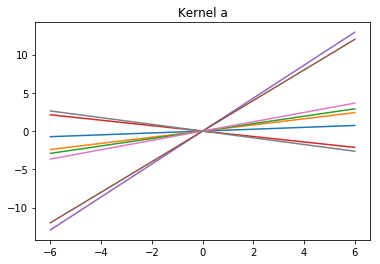

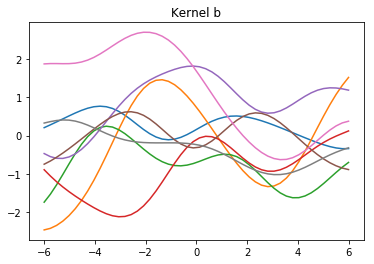

In [4]:
# plot
plt.figure()
for i in range(nSample):
    plt.plot(x, y1[i, :])
plt.title("Kernel a")

plt.figure()
for i in range(nSample):
    plt.plot(x, y2[i, :])
plt.title("Kernel b")

### 1b

In [5]:
nSample = 21
xmin = -10
xmax = xmin + nSample
x = np.arange(xmin, xmax)

C1 = np.zeros((nSample, nSample))
C2 = np.zeros((nSample, nSample))
for i in range(nSample):
    C1[i, :] = Kernel1(x, x[i])
    C2[i, :] = Kernel2(x, x[i]) 

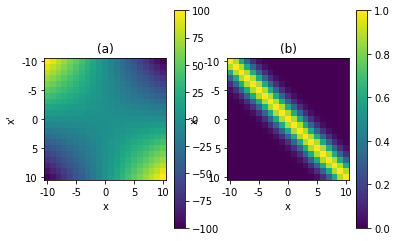

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(C1)
plt.colorbar()
plt.xticks([0, 5, 10, 15, 20], [-10, -5, 0, 5, 10])
plt.yticks([0, 5, 10, 15, 20], [-10, -5, 0, 5, 10])
plt.xlabel("x")
plt.ylabel("x'")

plt.title("(a)")
plt.subplot(1,2,2)
plt.imshow(C2)
plt.title("(b)")
plt.colorbar()
plt.xticks([0, 5, 10, 15, 20], [-10, -5, 0, 5, 10])
plt.yticks([0, 5, 10, 15, 20], [-10, -5, 0, 5, 10])
plt.xlabel("x")
plt.ylabel("x'")

In the kernel b, only a few adjacent variables are correlated, that is, only diagoal elements of the covariance matrix have higher values, while in kernel a, variables that are far from each other are also correlated.  

### 1c

In [7]:
with codecs.open("./data/ex4/Traindatax", encoding='utf-8-sig') as f:
    xTrain = np.loadtxt(f)  
with codecs.open("./data/ex4/Traindatay", encoding='utf-8-sig') as f:
    yTrain = np.loadtxt(f)  
    

FileNotFoundError: [Errno 2] No such file or directory: './data/ex4/Traindatax'

In [9]:
beta = 1/0.01

xPredict = np.linspace(-1, 7, 51)
N = len(xTrain)
N_new = len(xPredict)
k1 = np.zeros((N, N_new))
k2 = np.zeros((N, N_new))
for i in range(N):
    k1[i, :] = Kernel1(xTrain[i], xPredict)
    k2[i, :] = Kernel2(xTrain[i], xPredict)
Cn1 = np.zeros((N, N))
Cn2 = np.zeros((N, N))
for i in range(N):
    Cn1[i, :] = Kernel1(xTrain[i], xTrain)
    Cn2[i, :] = Kernel2(xTrain[i], xTrain)
Cn1 += np.eye(N) / beta
Cn2 += np.eye(N) / beta
m1 = k1.T @ np.linalg.inv(Cn1) @ yTrain
m2 = k2.T @ np.linalg.inv(Cn2) @ yTrain

c1 = Kernel1(xPredict, xPredict) + 1/beta
c2 = Kernel2(xPredict, xPredict) + 1/beta 

sigma1 = np.sqrt(c1 - np.diagonal(k1.T @ np.linalg.inv(Cn1) @ k1))
sigma2 = np.sqrt(c2 - np.diagonal(k2.T @ np.linalg.inv(Cn2) @ k2))


Text(0.5,1,'Kernel (b)')

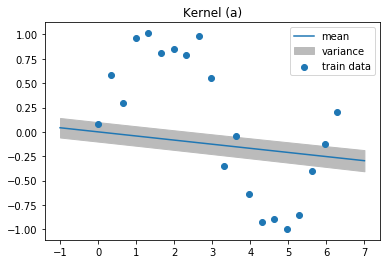

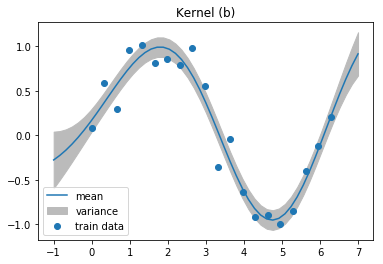

In [11]:
plt.figure()
plt.fill_between(xPredict, m1 - sigma1, m1 + sigma1, color = "#bbbbbb")
plt.plot(xPredict, m1) 
plt.scatter(xTrain, yTrain)
plt.legend(["mean", "variance", "train data"])
plt.title("Kernel (a)")

plt.figure()
plt.fill_between(xPredict, m2 - sigma2, m2 + sigma2, color = "#bbbbbb")
plt.plot(xPredict, m2) 
plt.scatter(xTrain, yTrain)
plt.legend(["mean", "variance", "train data"])
plt.title("Kernel (b)")

In [33]:
def Kernel2(x1, x2):
    beta = 40
    return np.exp(-beta / 2 * (x1 - x2)**2)

In [34]:

xPredict = np.linspace(-1, 7, 51)
N_new = len(xPredict)
k2 = np.zeros((N, N_new))

for i in range(N):
    k2[i, :] = Kernel2(xTrain[i], xPredict)
    
Cn2 = np.zeros((N, N))
for i in range(N):
    Cn2[i, :] = Kernel2(xTrain[i], xTrain)
Cn2 += np.eye(N) / beta
m2 = k2.T @ np.linalg.inv(Cn2) @ yTrain
c2 = Kernel2(xPredict, xPredict) + 1/beta 

sigma2 = np.sqrt(c2 - np.diagonal(k2.T @ np.linalg.inv(Cn2) @ k2))

Text(0.5,1,'Kernel (b): beta = 40')

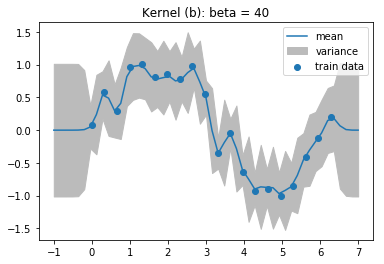

In [35]:
plt.figure()
plt.fill_between(xPredict, m2 - sigma2, m2 + sigma2, color = "#bbbbbb")
plt.plot(xPredict, m2) 
plt.scatter(xTrain, yTrain)
plt.legend(["mean", "variance", "train data"])
plt.title("Kernel (b): beta = 40")

With higher $\beta$, the model is too complicated. Variance is low only in observed points, otherwise variance is very high.

## 2 Gaussian processes and stochastic DEQs

*Exercise 2a:* First we are asked to calculate the spectral density function for a Gaussian process. We know that the autocorrelation function for a process with $\mu = 0$ is equal to the covariance matrix. And we know that the covariance matrix is given by the kernel. Therefore:

\begin{equation}
r_{yy}(\tau) = k(\tau)
\end{equation}

This means that the spectral density function is given by the Fourier transform of the kernel:

\begin{equation}
S_{yy}(\omega) = \int k(\tau) e^{- i \omega \tau} d\tau 
\end{equation}

We now want to calculate this for a specific kernel $k(\tau) = \exp(- \alpha |\tau|)$:

\begin{equation}
S_{yy}(\omega) = \int_{-\infty}^{\infty} \exp(- \alpha |\tau|) e^{- i \omega \tau} d\tau
\end{equation}

It is well known that this integral is given by a Lorentzian function:

\begin{equation}
S_{yy}(\omega) = \frac{2 \alpha}{\alpha^2 + \omega^2}
\end{equation}

\begin{equation}
E[\tilde{y}(\omega) \tilde{y}^*(\omega')] = -\int p_{\tilde{y}} \int \int y(x) y^*(x - \tau) e^{-i (\omega - \omega')  x} e^{- \omega' \tau} dx d\tau d\tilde{y}
\end{equation}

*Exercise 2b:* Next we want to calculate $E[\tilde{y}(\omega) \tilde{y}^*(\omega')]$ for a stationary process $y(x)$. The expectation value is given by:

\begin{equation}
E[\tilde{y}(\omega) \tilde{y}^*(\omega')] = \int p_{\tilde{y}} \tilde{y}(\omega) \cdot \tilde{y}^*(\omega') d\tilde{y}
\end{equation}

Including the Fourier transformation:

\begin{equation}
E[\tilde{y}(\omega) \tilde{y}^*(\omega')] = \int p_{\tilde{y}} \left(\int y(x) e^{-i \omega x} dx \cdot \int y^*(x') e^{i \omega' x'} dx'\right) d\tilde{y}
\end{equation}

Without loss of generalization, we set $x' = x - \tau$:  

As we look at a stationary process that means that the term $y(x) y^*(x - \tau)$ only depends on $\tau$. Therefore, the integral over $\tau$ gives the Fourier transform over $y(x) \cdot y^*(x - \tau)$. It can be threrefore separated from the integration over $x$ and gives together with the integration over $d\tilde{y}$ the spectral density function:

\begin{equation}
E[\tilde{y}(\omega) \tilde{y}^*(\omega')] =  - S(\omega') \int e^{- i (\omega - \omega') x} dx
\end{equation}

For the second term, we use completeness relation and finally get:

\begin{equation}
E[\tilde{y}(\omega) \tilde{y}^*(\omega')] = -2 \pi \cdot S(\omega) \cdot \delta(\omega - \omega')
\end{equation}

### Exercise 2d

Next, we want to compute the general solution of the following equation:

\begin{equation}
\frac{dy}{dx} + a y(x) = z(x)
\end{equation}

Herefore, we Fourier transform this equation (using linearity of FT):

\begin{equation}
F(\frac{dy}{dx}) + a \cdot F(y(x)) = F(z(x))
\end{equation}

This is equivalent to:

\begin{equation}
F(\frac{dy}{dx}) = a \tilde{y}(\omega) = \tilde{z}(\omega)
\end{equation}



We know that the Fourier transform of a derivative is given by:

\begin{equation}
F(\frac{dy}{dx}) = i \omega \tilde{y}(\omega)
\end{equation}

This leads to:

\begin{equation}
 i \omega \tilde{y}(\omega) + a \tilde{y}(\omega) = \tilde{z}(\omega)
\end{equation}

With this we can find $\tilde{y}(\omega)$:

\begin{equation}
\tilde{y}(\omega) = \frac{\tilde{z}(\omega)}{ i \omega + a}
\end{equation}

The solution $y(x)$ can now be found by inverse Fourier transform:

\begin{equation}
y(x) = \frac{1}{2 \pi} \int \frac{\tilde{z}(\omega)}{ i \omega + a} e^{i \omega x} d\omega
\end{equation}

### Exercise 2d

 The spectral density of $z(x)$ is given by the Fourier transform of the $\delta$-function:

\begin{equation}
S_{zz}(\omega) = \int \delta(\tau) \cdot e^{- i \omega \tau} d\tau = e^{0} = 1
\end{equation}

With this and 2b, we get for $E[\tilde{z}(\omega)\tilde{z}^*(\omega')]$:

\begin{equation}
E[\tilde{z}(\omega)\tilde{z}^*(\omega')] = - 2 \pi \delta(\omega - \omega')
\end{equation}

And therefore with 2d:

\begin{equation}
E[\tilde{y}(\omega)\tilde{y}^*(\omega')] = - 2 \pi \cdot \frac{1}{a -  i \omega} \cdot \frac{1}{a + i \omega} \cdot \delta(\omega - \omega') 
\end{equation}

This is equivalent to:

\begin{equation}
E[\tilde{y}(\omega)\tilde{y}^*(\omega')] =- 2 \pi \cdot \frac{1}{a^2 + \omega^2} \cdot \delta(\omega - \omega') 
\end{equation}

So we can see that the responce to the white noice has correlation in the frequencies that differers only on constant from correlation of the white noice friquencies.  

*Exercise 2e:* The Fourier Transform of this differential equation is given by:

\begin{equation}
\sum_{l=0}^L a_l (i \omega)^l \tilde{y}(\omega) = \tilde{z}(\omega)
\end{equation}

Therefore, the solution from above can be easily extented to this differential equation by replacing $(i \omega)$ by the sum $\sum_{l=1}^L a_l ( i \omega)^l$. The solution is then given by:

\begin{equation}
y(x) = \frac{1}{2 \pi} \int \frac{\tilde{z}(\omega)}{\sum_{l=1}^L a_l (i \omega)^l + a_0} e^{i \omega x} d\omega
\end{equation}

The spectral density function can be calculated from this:

\begin{equation}
S_{yy}(\omega) =    \frac{1}{\sum_{l=1}^L a_l ( i \omega)^l + a_0} \cdot \frac{1}{(\sum_{l=1}^L a_l (i \omega)^l + a_0)^*}
\end{equation}

As the spectral density seems to have again a Lorentzian shape, I would assume a multi-exponential decay as a kernel function of the stochastic process.